# Ejemplo básico con TensorFlow 2.0

En este ejercicio vamos a recrear nuestro algoritmo de aprendizaje utilizando TF 2.

## Importar las librerías relevantes

In [1]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import tensorflow as tf

## Generación de datos

Se generan los datos de la misma manera que lo hicimos en el ejercicio anterior.  La única diferencia es que ahora se guardan los datos en un archivo *.npz*.  NPZ es un tipo de archivo propio de NumPy que permite guardar arreglos NumPy.  Se introduce este cambio porque en el ML a menudo:

* se reciben datos (csv, base de datos, etc.)
* se preprocesan los datos y se dejan en un formato deseado (se verá este tema después)
* se guardan los datos en archivos npz (si es que se está trabajando con Python) para uso posterior

No hay nada especial de todo esto.  Solo se guardan arreglos NumPy en un archivo re-utlizable.

Se trabajará con dos variables de entrada, x1 y x2.  Estas se generan al azar a partir de una distribución uniforme.

Se creará una matriz con estas dos variables.  La matriz X del modelo lineal y = x * w + b

In [2]:
# Por facilidad, declaramos una variable que indique el tamaño del conjunto 
#      de datos de entrenamiento.
observaciones = 1000

x1 = np.random.uniform(low = -10, high = 10, size = (observaciones,1))
x2 = np.random.uniform(-10, 10, (observaciones,1)) # nótese que no se requieren las palabras clave

X = np.column_stack((x1,x2))



### Generar las metas a las que debemos apuntar

La función a usar: 

f(x1, x2) = 2 * x1 - 3 * x2 + 5 + <ruido pequeño>

El ruido es para hacerlo más realista.

En esencia, se puede ver que los pesos serán 2 y -3, y es sesgo es 5

Utilizando la metodología de ML, se vé si el algoritmo ha aprendido la función. 

In [3]:
ruido = np.random.uniform(-1, 1, (observaciones,1))

y = 2 * x1 - 3 * x2 + 5 + ruido

Hasta ahora todo ha sido igual.  El siguiente paso sí es nuevo y es que se guarda la información en un archivo *.npz* que se ha denominado "Datos_TF)

In [4]:
np.savez('Datos_TF', entradas = X, targets = y)  # nótese que se puede usar cualquier nombre

## Resolver con TensorFlow

<i/>Nota: Esta introducción de TensorFloe es muy básica.  El TF tiene muchas más capacidaded y profundidad que esto.<i>

In [5]:
# Se cargan los datos desde el archivo NPZ.  Por supuesto, esto no era necesario acá
datos = np.load('Datos_TF.npz')

En el ejercicio anterior se tuvieron que dar valores iniciales, acá solo se dan:

1.  El número de variables de entrada
2.  El número de salidas que tenemos

In [6]:
tamanio_entrada = 2

tamanio_salida = 1

### Describir el modelo

En otras aplicaciones simplemente se usa un modelo que ya se haya hecho.  Con TensorFlow hay que armarlo

Como el ejemplo es muy simple...es lineal...se utiliza el método **"Sequential"**

Nótese que no se pide cálculo alguno - solo se describe la red

Acá se debe listar cada capa "layer" de la red neuronal

El método **"Dense"** realiza una operación matemática **.dot(u, v) + z**.  Esto es exactamente lo que que se necesita: (xw + b)

El único parámetro necesario es el tamaño de la salida **tamanio_salida** en el código

Hay otros parámetros que se pueden incluir para particularizar el modelo, en este caso, se está tratando de crear una solución que sea tan parecida a la del modelo NumPy anterior por lo que se agregan:

* kernel_initializer   -   kernel es un término más generalizado para los pesos
* bias_initializer     -   sesgo

In [7]:
modelo = tf.keras.Sequential([
                           
                            tf.keras.layers.Dense(tamanio_salida,
                                                 kernel_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1),
                                                 bias_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1)
                                                 )
                            ])

También se puede definir un optimizador a la medida, en el que se puede especificar la tasa de aprendizaje. De los que hay disponibles, el SGD (Stochastic Gradient Descent) es una generalización de la que se platicó en clase, sin darle nombre.

In [8]:
optimizador_adhoc = tf.keras.optimizers.SGD(learning_rate = 0.02)

Para la función de pérdida, se utilizará la de **L2-norm**.  Esta también se conoce como **Least sum of squares (Least sum of squares error)**.  El escalamiento se logra obteniendo la media para el # de observaciones.  Esto es justamente lo que hace el **mean squared error**

En algún momento, podría ser necesario una función de pérdida hecha a la medida.  Eso es mucho más difícil implementar y no se trabajará en este curso.

**"compile"** es donde se pueden indicar los optimizadores y la pérdida.

In [9]:
modelo.compile(optimizer = optimizador_adhoc, loss='mean_squared_error')

Finalmente, se ajusta el modelo con los datos (o se modelan los datos), indicando las *entradas* y los *targets*...así se denominaron al guardar el archivo.  

En vez de usar el término *iteraciones*, se utiliza el término *épocas*.  Si no se especifica el número de épocas este será 1 (una sola época de entrenamiento), así que este número es algo obligatorio.

El parámetro **"verbose"** se refiere a cuánta información queremos que despliegue durante la ejecución.  Se vale probar diferentes números...se prueban los valores 0, 1 y 2

In [10]:
modelo.fit(datos['entradas'], datos['targets'], epochs = 100, verbose = 2)

Epoch 1/100
32/32 - 0s - loss: 25.6195 - 308ms/epoch - 10ms/step
Epoch 2/100
32/32 - 0s - loss: 1.1702 - 31ms/epoch - 958us/step
Epoch 3/100
32/32 - 0s - loss: 0.4199 - 29ms/epoch - 901us/step
Epoch 4/100
32/32 - 0s - loss: 0.4250 - 27ms/epoch - 842us/step
Epoch 5/100
32/32 - 0s - loss: 0.3784 - 28ms/epoch - 867us/step
Epoch 6/100
32/32 - 0s - loss: 0.3498 - 26ms/epoch - 823us/step
Epoch 7/100
32/32 - 0s - loss: 0.3760 - 29ms/epoch - 907us/step
Epoch 8/100
32/32 - 0s - loss: 0.3887 - 30ms/epoch - 931us/step
Epoch 9/100
32/32 - 0s - loss: 0.4048 - 27ms/epoch - 856us/step
Epoch 10/100
32/32 - 0s - loss: 0.4024 - 28ms/epoch - 881us/step
Epoch 11/100
32/32 - 0s - loss: 0.3933 - 28ms/epoch - 861us/step
Epoch 12/100
32/32 - 0s - loss: 0.3673 - 28ms/epoch - 885us/step
Epoch 13/100
32/32 - 0s - loss: 0.3661 - 24ms/epoch - 736us/step
Epoch 14/100
32/32 - 0s - loss: 0.3755 - 32ms/epoch - 1ms/step
Epoch 15/100
32/32 - 0s - loss: 0.3639 - 27ms/epoch - 836us/step
Epoch 16/100
32/32 - 0s - loss: 0.3

## Extracción de los pesos y sesgos

La extracción de el(los) peso(s) y sesgo(s) de un modelo no es un paso esencial para el proceso de ML.  De hecho, en un contexto de aprendizaje profundo, no da mucha información útil.  Sin embargo, este ejemplo simple se armó de tal forma que permite verificar si las respuestas que da el modelo son correctas.

In [11]:
modelo.layers[0].get_weights()    # el cero (0) es porque solo tenemos una capa

[array([[ 2.025694 ],
        [-2.8542151]], dtype=float32),
 array([4.9841757], dtype=float32)]

Se pueden almacenar los pesos y los sesgos en variables diferentes para facilitar la revisión.

OJO!   Pueden haber cientos o miles de estos!!!!

In [12]:
pesos = modelo.layers[0].get_weights()[0]
pesos

array([[ 2.025694 ],
       [-2.8542151]], dtype=float32)

In [13]:

sesgos = modelo.layers[0].get_weights()[1]
sesgos

array([4.9841757], dtype=float32)

## Hacer predicciones

Una vez más, este no es un paso esencial, sin embargo, generalmente sí se desean hacer predicciones.

Se puede pedirle al modelo que prediga nuevos valores.  A veces es útil redondear los valores para que la salida sea más legible.  

Generalmente se utiliza este método con DATOS NUEVOS, en vez de usar los datos de entrenamiento originales.

In [14]:
modelo.predict_on_batch(datos['entradas']).round(1)[:5, :]

array([[-3. ],
       [-4.1],
       [ 1.7],
       [ 7.3],
       [15. ]], dtype=float32)

Si se despliegan la metas (valores reales), se pueden comparar visualmente con las predicciones.

In [15]:
datos['targets'].round(1)[:5, :]

array([[-3.8],
       [-6.4],
       [ 0.4],
       [ 6.3],
       [15.6]])

## Graficar los datos

El modelo está ya optimizado, por lo que las salidas se han calculado sobre la última forma, o el último estado, del modelo.

Es necesario comprimir o empacar **"squeeze"** los arreglos para dejarlos en un formato que es el esperado por la función graficadora.  No cambia nada ya que se dejaron dimensiones de tamaño 1 - solo es un tecnisismo

### Con matplotlib

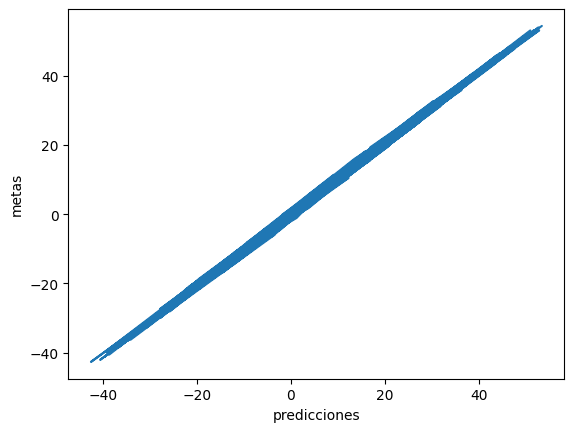

In [16]:
plt.plot(np.squeeze(modelo.predict_on_batch(datos['entradas'])), 
         np.squeeze(datos['targets']))
plt.xlabel('predicciones')
plt.ylabel('metas')
plt.show()

### Con Plotly Express

In [17]:
fig = px.scatter(x = np.squeeze(modelo.predict_on_batch(datos['entradas'])), 
                 y =  np.squeeze(datos['targets']))

fig.update_layout(
    title="Comparación predicciones vrs metas",
    xaxis_title="Predicciones",
    yaxis_title="Metas",
    width = 600,
    height = 400,)

fig.show()

Listo, lo que se vé debe ser exactamente igual a lo que se vió en el ejercicio pasado!

A estas alturas quizás no se le ve la gracia al TensorFlow.  En términos de líneas código es igual al del ejercicio con NumPy para llegar al mismo resultado.  Sin embargo, a medida que se profundice en el tema, se podrá ver que TensorFlow ahorra cientos de líneas de código.